!pip install pandas_profiling

<p class='p3' id='imports'>

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
from sklearn.datasets import fetch_california_housing
import pickle

<p class='p3' id='data'>Les données</p>

In [32]:
data = fetch_california_housing() # Import des données.
# Création du dataframe à partir des données
df_initial = pd.DataFrame(data.data, columns=data.feature_names) 
df_initial[data.target_names] = pd.DataFrame(data.target)

df_initial.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [96]:
data.target_names

['MedHouseVal']

In [168]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

<p class='p3' id='profile'>Profilage des données</p>

In [25]:
california_house_profile = \
ProfileReport(df_initial, title='Pandas Profiling Report\nOn California house data', explorative=True)

In [26]:
california_house_profile.to_file("California house profile.html")

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<a href=".\California house profile.html" onclick=return(showthis(this.href));><font color="orangered">Voir le profiling ici</font></a>

<p class='text'>Les données sont propres et ne nécessitent pas de nettoyage. On peut passer directement au model</p>

<p class='p3' id='split'>Split data/target - train/test</p>

In [6]:
data_train, data_test, target_train, target_test = train_test_split(
    df_initial[data.feature_names], 
    df_initial[data.target_names], 
    test_size=0.25,
    random_state=0
)

In [163]:
data_train.iloc[0]

MedInc           7.3003
HouseAge        19.0000
AveRooms         7.9616
AveBedrms        1.1376
Population    1926.0000
AveOccup         3.0816
Latitude        38.4600
Longitude     -122.6800
Name: 19226, dtype: float64

In [166]:
pickle.dump(data_train, open('data_train_example.p', "wb"))
pickle.dump(target_train, open('target_train_example.p', "wb"))

<p class='p3' id='models'>Les modèles retenus pour la regression</p>
<p class='text'>Nous retenons comme modèle :
    <ul> 
        <li>Neural Network Regression</li>
        <li>Decision Tree Regression</li>
        <li>LASSO Regression</li>
        <li>ElasticNet Regression</li>
    </ul> 
    Le random state sera 0
</p>

In [48]:
random_state = 0

In [134]:
models =[]

<p class='p2' id='tree'>Arbre de decision</p>

In [72]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()

tree_model.fit(data_train, target_train)
tree_model.score(data_test, target_test)

0.5810596763166552

In [135]:
models.append(tree_model)

<p class='p2' id='linear'>Modèle linéaire</p>

In [69]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(data_train, target_train)
lr.score(data_test, target_test)

0.5911695436410496

In [136]:
models.append(lr)
models

[DecisionTreeRegressor(), LinearRegression()]

<p class='p2' id='randomforest'>RandomForestRegressor</p>

In [71]:
from sklearn.ensemble import RandomForestRegressor

regr_rf = RandomForestRegressor(random_state=0)
regr_rf.fit(data_train, target_train.values[:,0])
regr_rf.score(data_test, target_test.values[:,0])

0.7939779234183976

In [137]:
models.append(regr_rf)

<p class='p2' id='gradient'>GradientBoostingRegressor</p>

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

regr_gb = GradientBoostingRegressor(random_state=0)
regr_gb.fit(data_train, target_train.values[:,0])
regr_gb.score(data_test, target_test.values[:,0])

0.7809004568284745

In [138]:
models.append(regr_gb)

<p class='p2' id='rna'>Réseau de neurone simple</p>

In [80]:
from sklearn.preprocessing import MinMaxScaler

<p class='p1' id='scaling'>Scaling</p>
<p class='text'> Les résaux de neuronne ont besoin de variables entre 0 et 1, on va donc appliquer un minmax scaler sur les données. Il est parmétré par défaut pour transformer les données en valeurs entre 0 et 1. Mais on fait bien attention à ne pas l'entrainer sur les données de test pour ne pas influencer le modèle.</p>

In [82]:
scaler = MinMaxScaler()
data_train_ann= scaler.fit_transform(data_train)
data_test_ann = scaler.transform(data_test)

In [169]:
pickle.dump(scaler, open("scaler.p", 'wb'))

<p class='p1' id=modelrna>Creation modèle</p>

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [173]:
model_ann = Sequential()

model_ann.add(Dense(data_train.shape[0],activation='relu'))
model_ann.add(Dropout(0.5))

model_ann.add(Dense(3,activation='relu'))
model_ann.add(Dropout(0.5))

model_ann.add(Dense(1))

model_ann.compile(optimizer='adam', loss='mse')

<p class='p1' id='train_rna'>Entraînement du modèle</p>

In [177]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [175]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [178]:
filepath="weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"
callbacks_list = [ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')]
#forme d'enregistrement, selon la loss, exprimé par écriture, uniquement lors d'amélioration, "min" = for loss this should be min

In [179]:
model_ann.fit(x=data_train_ann,y=target_train.values,
          validation_data=(data_test_ann,target_test.values),
          batch_size=128,epochs=400, callbacks=[early_stop, callbacks_list])

Epoch 1/400
121/121 [==============================] - ETA: 0s - loss: 3.1614- ETA: 3s
Epoch 00001: loss improved from inf to 3.16140, saving model to weights-improvement-01-3.1614-bigger.hdf5
121/121 [==============================] - 10s 85ms/step - loss: 3.1614 - val_loss: 1.7451
Epoch 2/400
121/121 [==============================] - ETA: 0s - loss: 2.7439
Epoch 00002: loss improved from 3.16140 to 2.74392, saving model to weights-improvement-02-2.7439-bigger.hdf5
121/121 [==============================] - 10s 85ms/step - loss: 2.7439 - val_loss: 1.3739
Epoch 3/400
121/121 [==============================] - ETA: 0s - loss: 2.5594
Epoch 00003: loss improved from 2.74392 to 2.55939, saving model to weights-improvement-03-2.5594-bigger.hdf5
121/121 [==============================] - 13s 109ms/step - loss: 2.5594 - val_loss: 1.4385
Epoch 4/400
121/121 [==============================] - ETA: 0s - loss: 2.3656
Epoch 00004: loss improved from 2.55939 to 2.36562, saving model to weights-imp

121/121 [==============================] - ETA: 0s - loss: 0.9863
Epoch 00032: loss improved from 0.98829 to 0.98634, saving model to weights-improvement-32-0.9863-bigger.hdf5
121/121 [==============================] - 10s 86ms/step - loss: 0.9863 - val_loss: 0.7905
Epoch 33/400
121/121 [==============================] - ETA: 0s - loss: 1.0000
Epoch 00033: loss did not improve from 0.98634
121/121 [==============================] - 11s 94ms/step - loss: 1.0000 - val_loss: 0.8296
Epoch 34/400
121/121 [==============================] - ETA: 0s - loss: 0.9779
Epoch 00034: loss improved from 0.98634 to 0.97795, saving model to weights-improvement-34-0.9779-bigger.hdf5
121/121 [==============================] - 10s 85ms/step - loss: 0.9779 - val_loss: 0.8520
Epoch 35/400
121/121 [==============================] - ETA: 0s - loss: 0.9945
Epoch 00035: loss did not improve from 0.97795
121/121 [==============================] - 12s 102ms/step - loss: 0.9945 - val_loss: 0.8143
Epoch 36/400
121/1

In [180]:
losses = pd.DataFrame(model_ann.history.history)

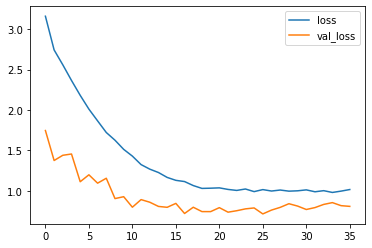

In [181]:
losses.plot()

<p class='p1' id='eval'>Evaluation du modèle</p>

In [182]:
from sklearn.metrics import r2_score

In [183]:
predictions = model_ann.predict(data_test)

In [184]:
r2_score(target_test, predictions)

-4234406.435834386

In [185]:
models.append(model_ann)

In [187]:
models.remove(models[-2])

In [188]:
models

[DecisionTreeRegressor(),
 LinearRegression(),
 RandomForestRegressor(random_state=0),
 GradientBoostingRegressor(random_state=0),

<p class='p3' id='pickle'>Export des modèles pour notre app</p>

<p class='text'>On exporte les modèles sous forme de pickle pour pouvoir les utiliser dans une application streamlit</p>

In [152]:
for i, model in enumerate(models):
    pickle.dump(model, open(f"model{model}{i}.p", 'wb'))

OSError: [Errno 22] Invalid argument: 'model<tensorflow.python.keras.engine.sequential.Sequential object at 0x0000022C3058B460>4.p'

In [192]:
model_ann.save('modelann.h5')

<p class='p4'>Mise en forme du notebook</p>

In [86]:
%%HTML
<!--
HTML and CSS code to have a navigation bar on the left and an area to write notes on the right.
The script showthis is used to display a link in a new window.
-->
<style>
    .navigation {
        position: fixed;
        top: 100px;
        left: 0px;
        background: white;
        height: 100%;
        width: 9%;
        padding: 20px;
        overflow-y:scroll;
        font-size: 10px;
    }
    .notes {
        position: fixed;
        top: 100px;
        right: 0px;
        background: white;
        height: 100%;
        width: 11%;
        padding: 20px;
        padding-bottom: 50px;
        overflow-y:scroll;
    }
    .container {
        width:80%
    }
    .p1 {
        font-family: "Lucida Console", "Courier New", monospace;
        font-size: 1.5em;
        color: #8A2809;
    }
    .p2 {
        font-family: "Lucida Console", "Courier New", monospace;
        font-size: 1.9em;
        color: orangered;
    }
    .p3 {
        font-family: "Lucida Console", "Courier New", monospace;
        font-size: 2em;
        color: orange;
    }
    .p4 {
        font-family: "Lucida Console", "Courier New", monospace;
        font-size: 1.7em;
        color: black;
    }
    .text {
        font-family: "Lucida Console", "Courier New", monospace;
        font-size: 1em;
        color: black;
    }
</style>
<script>
function showthis(url) {
	window.open(url, "pres", "toolbar=yes,scrollbars=yes,resizable=yes,top=10,left=400,width=500,height=500");
	return(false);
}
</script>

<font color="orangered" size=5>Menu</font>
<a id=menu></a>
<div class=navigation>
    <div>
        <a href=https://cutt.ly/linkedin_Nicolas_Churlet onclick=return(showthis(this.href));><font color="orangered">Contact</font></a>
    </div>
    <div>
        <a href="#imports"><font color="blue">Imports</font></a>
    </div>
    <div>
        <a href="#data"><font color="blue">Données</font></a>
    </div>
    <div>
        <a href="#profile"><font color="blue">Profilage</font></a>
    </div>
    <div>
        <a href="#split"><font color="green">Split</font></a>
    </div>
    <div>
        <a href="#models"><font color="green">Modèles</font></a>
    </div>
    <div>
        <a href="#tree"><font color="#808000">_Abre de décision</font></a>
    </div>
    <div>
        <a href="#linear"><font color="#808000">_Régression linéaire</font></a>
    </div>
    <div>
        <a href="#randomforest"><font color="#808000">_Random forest</font></a>
    </div>
    <div>
        <a href="#gradient"><font color="#808000">_Greadient Boost</font></a>
    </div>
    <div>
        <a href="#rna"><font color="#808000">_RNA</font></a>
    </div>
    <div>
        <a href="#scaling"><font color="maroon">__Scaling</font></a>
    </div>
    <div>
        <a href="#modelrna"><font color="maroon">__Architecture</font></a>
    </div>
    <div>
        <a href="#train_rna"><font color="maroon">__Entraînement</font></a>
    </div>
    <div>
        <a href="#eval"><font color="maroon">__Evaluation</font></a>
    </div>
    <div>
        <a href="#pickle"><font color=#D7DE00>Export</font></a>
    </div>
    <div>
        <br><a href="#menu"><font color="orange">Menu</font></a>
    </div>
</div>